In [119]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [120]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

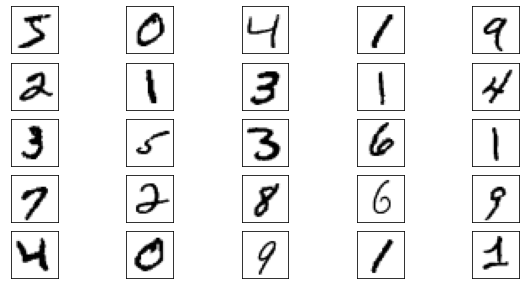

In [121]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [122]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [123]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2878 - accuracy: 0.9169 - val_loss: 0.1567 - val_accuracy: 0.9548
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1283 - accuracy: 0.9625 - val_loss: 0.1257 - val_accuracy: 0.9613
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0875 - accuracy: 0.9741 - val_loss: 0.0985 - val_accuracy: 0.9704
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0665 - accuracy: 0.9795 - val_loss: 0.0921 - val_accuracy: 0.9732
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0931 - accuracy: 0.9715


[0.09314609318971634, 0.9714999794960022]

In [137]:
n = 20
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
#print(res)
print( f"Это цифра: {np.argmax(res)}" )

Это цифра: 9


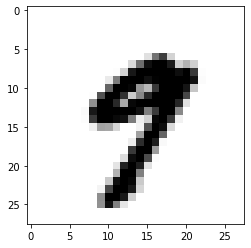

In [138]:
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [65]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

#print(pred.shape)

print(pred[:20])
print(y_test[:20])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [56]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

[ True  True  True  True  True  True  True  True  True  True]


In [57]:
x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

(262, 28, 28)


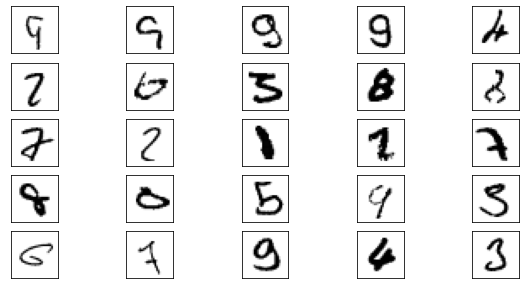

In [184]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()

In [187]:
def prep_img(name):
  img = plt.imread(name)
  img = img[:,:,0]
  img = 1 - img 
  return(img)

Это цифра: 3


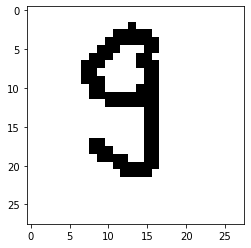

In [188]:
image = prep_img("img.png")
x = np.expand_dims(image, axis=0)
res = model.predict(x)
#print(res)
print( f"Это цифра: {np.argmax(res)}" )
plt.imshow(image, cmap=plt.cm.binary)
plt.show()